<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/colab/sketch/justin/ANIMATE_COMPAREwith2019_Clean_CH_2020_Social_Distancing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean Chicago 2020 Social Distancing Dataset

**Instructions:**

1. Mount the google drive to access the data by following **Steps to Mount the Drive**.
2. Provide the drive file path to the data, city name, and year in the fourth code cell. 

**Steps to Mount the Drive:**

1. Execute the second code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [2]:
pip install geopandas

In [3]:
pip install geoplot

In [4]:
import os
import geopandas
import geoplot
import mapclassify
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

import altair as alt
from vega_datasets import data

# # Allow altair to visualize large datasets
# alt.data_transformers.disable_max_rows()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
city = 'Chicago'
city_directory = 'ch'
year = '2020'

# Provide a list of CSV file paths to read
path = Path('drive/MyDrive/big-data-project/data/clean-data/')
path_list = [path/city_directory/'social'/year]

In [7]:
# # Chicago Counties
# fips_ch = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

# # New York Counties
# fips_ny = ['36061','36047','36005','36085','36081']

# # LA Counties
# fips_la = ['06037','06059']

# path = Path('/Users/justinsnider/nyu-big-data/project/clean-data/')
# dir_list_la = [path/'la'/'social'/'2019',
#                path/'la'/'social'/'2020']

# dir_list_ny = [path/'ny'/'social'/'2019',
#                path/'ny'/'social'/'2020']

# dir_list_ch = [path/'ch'/'social'/'2019',
#                path/'ch'/'social'/'2020']

# dir_list = [path/'la'/'social'/'2019',
#             path/'la'/'social'/'2020',
#             path/'ny'/'social'/'2019',
#             path/'ny'/'social'/'2020',
#             path/'ch'/'social'/'2019',
#             path/'ch'/'social'/'2020']

In [8]:
#Appending into dataframe

def get_df(path_list):
    df = []
    first = True
    for directory in tqdm(path_list, desc='Years'):
        f_list = os.listdir(directory)
        csv_files = [directory/f for f in f_list if f.endswith('.csv')]
        for csv in tqdm(csv_files, desc='Days'):
            if first:
                df = pd.read_csv(csv, dtype={'cbg': object})
                first = False
            else:
                df = df.append(pd.read_csv(csv, dtype={'cbg': object}), ignore_index=True)
    return df.sort_values(by=['date_range_start'])

In [9]:
%%time

df = get_df(path_list)



CPU times: user 9min 33s, sys: 17.7 s, total: 9min 51s
Wall time: 10min 12s


In [10]:
df

,Unnamed: 0,cbg,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
1965667,74661,170319900000,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,19,1947.0,"{""0"":3,""2001-8000"":2,""1-1000"":2,""1001-2000"":6,...","{""1001-2000"":73,""2001-8000"":248,""8001-16000"":6...",1,0,"{""721-1080"":4,""<60"":11,""361-720"":1,""61-360"":3}","[1,1,2,1,1,1,1,2,1,3,2,1,2,1,1,2,3,2,2,1,4,2,3,2]",1,1,"{""170310402021"":1,""170314201001"":1,""1703143060...",1,74,92,"{""21-45"":1,""46-60"":1,""721-840"":1,""301-360"":4,""...",0,"{""0-25"":11,""76-100"":3,""51-75"":1}",NaN,NaN,NaN
1965643,73995,170311002005,2020-01-01T00:00:00-06:00,2020-01-02T00:00:00-06:00,54,9541.0,"{""16001-50000"":7,""0"":19,"">50000"":5,""2001-8000""...","{""16001-50000"":195,"">50000"":334,""<1000"":19,""20...",18,709,"{""721-1080"":5,""361-720"":12,""61-360"":7,""<60"":9,...","[16,18,23,24,27,24,24,24,26,25,25,28,28,29,32,...",1,1,"{""170978648011"":3,""170318043083"":1,""1703180660...",1,94,93,"{""21-45"":4,""481-540"":3,""46-60"":3,""721-840"":3,""...",87,"{""26-50"":6,""51-75"":8,""0-25"":9,"">100"":1,""76-100...",NaN,NaN,NaN
1965644,73996,170312214003,2020-01-01T00:00:00-06:00,2020-01-02T00:00:00-06:00,56,4719.0,"{""16001-50000"":2,""0"":25,"">50000"":2,""2001-8000""...","{""16001-50000"":44,"">50000"":135,""<1000"":80,""200...",25,816,"{""721-1080"":5,""361-720"":9,""61-360"":7,""<60"":7,""...","[17,20,23,26,27,32,31,33,30,32,34,34,32,33,32,...",2,1,"{""170318150002"":1,""170312411002"":1,""1703122220...",1,14,108,"{""21-45"":5,""481-540"":1,""541-600"":2,""721-840"":2...",97,"{""26-50"":1,""51-75"":3,""0-25"":8,"">100"":6,""76-100...",NaN,NaN,NaN
1965645,73997,170318241074,2020-01-01T00:00:00-06:00,2020-01-02T00:00:00-06:00,123,4947.0,"{""16001-50000"":12,""0"":44,"">50000"":4,""2001-8000...","{""16001-50000"":73,"">50000"":302,""<1000"":143,""20...",44,915,"{""721-1080"":23,""361-720"":17,""61-360"":12,""<60"":...","[73,78,81,82,85,83,84,77,84,83,79,75,73,68,70,...",2,1,"{""170318253031"":1,""170319801001"":2,""1703182100...",1,78,193,"{""21-45"":2,""481-540"":1,""541-600"":1,""46-60"":8,""...",93,"{""26-50"":7,""51-75"":13,""0-25"":21,"">100"":1,""76-1...",NaN,NaN,NaN
1965646,73998,170318263012,2020-01-01T00:00:00-06:00,2020-01-02T00:00:00-06:00,72,10907.0,"{""16001-50000"":7,""0"":26,"">50000"":5,""2001-8000""...","{""16001-50000"":60,"">50000"":20,""<1000"":508,""200...",25,870,"{""721-1080"":10,""361-720"":7,""61-360"":11,""<60"":1...","[31,34,36,36,37,39,37,37,38,38,36,36,39,38,38,...",3,1,"{""170318273003"":1,""170319801001"":1,""1703182740...",1,28,118,"{""21-45"":6,""46-60"":2,""721-840"":3,""1201-1320"":4...",96,"{""0-25"":15,""76-100"":40,""51-75"":5,""26-50"":5}",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,149545,170898503022,2020-12-31T00:00:00-06:00,2021-01-01T00:00:00-06:00,113,1568.0,"{""16001-50000"":14,""0"":29,"">50000"":5,""2001-8000...","{""16001-50000"":104,"">50000"":241,""<1000"":259,""2...",26,960,"{""721-1080"":26,""361-720"":9,""61-360"":4,""<60"":32...","[63,63,64,63,62,65,63,64,54,53,56,53,53,53,56,...",10,1,"{""171118713064"":1,""170898501052"":1,""1708985050...",1,127,227,"{""21-45"":8,""481-540"":3,""541-600"":1,""721-840"":3...",78,"{""0-25"":33,""76-100"":58,""51-75"":10,""26-50"":3}",740.0,268.0,8230.0
2353876,149548,171978802042,2020-12-31T00:00:00-06:00,2021-01-01T00:00:00-06:00,241,2562.0,"{""16001-50000"":27,""0"":87,"">50000"":13,""2001-800...",

In [11]:
[print(c) for c in df.columns];

Unnamed: 0
cbg
date_range_start
date_range_end
device_count
distance_traveled_from_home
bucketed_distance_traveled
median_dwell_at_bucketed_distance_traveled
completely_home_device_count
median_home_dwell_time
bucketed_home_dwell_time
at_home_by_each_hour
part_time_work_behavior_devices
full_time_work_behavior_devices
destination_cbgs
delivery_behavior_devices
median_non_home_dwell_time
candidate_device_count
bucketed_away_from_home_time
median_percentage_time_home
bucketed_percentage_time_home
mean_home_dwell_time
mean_non_home_dwell_time
mean_distance_traveled_from_home


In [12]:
# Selecting the columsn that we need for the analysis
# col = ['date_range_start',
#        'cbg',
#        'device_count',  # Total active devices
#        'completely_home_device_count',
#        'part_time_work_behavior_devices',
#        'full_time_work_behavior_devices',
#        'delivery_behavior_devices',
#        'median_percentage_time_home',
#        'median_home_dwell_time',
#        'mean_home_dwell_time',
#        'median_non_home_dwell_time',
#        'mean_non_home_dwell_time',
#        'distance_traveled_from_home', # Median Distance traveled
#        'mean_distance_traveled_from_home']
col = ['date_range_start',
       'cbg',
       'device_count',  # Total active devices
       'completely_home_device_count',
       'part_time_work_behavior_devices',
       'full_time_work_behavior_devices']
devices_mobility = df[col]

In [13]:
#Renaming columns

devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
1965667,2020-01-01T00:00:00-05:00,170319900000,19,1,1,1
1965643,2020-01-01T00:00:00-06:00,170311002005,54,18,1,1
1965644,2020-01-01T00:00:00-06:00,170312214003,56,25,2,1
1965645,2020-01-01T00:00:00-06:00,170318241074,123,44,2,1
1965646,2020-01-01T00:00:00-06:00,170318263012,72,25,3,1
...,...,...,...,...,...,...
2353875,2020-12-31T00:00:00-06:00,170898503022,113,26,10,1
2353876,2020-12-31T00:00:00-06:00,171978802042,241,86,14,10
2353877,2020-12-31T00:00:00-06:00,171978838081,78,29,2,1
2354426,2020-12-31T00:00:00-06:00,170316120002,29,16,1,1


In [14]:
# devices_mobility

In [15]:
#Listing out the device count columns

device_columns = ['completely_home','part_time_work','full_time_work']

In [16]:
#Calculating percentage for all the device columns
for column in device_columns :
    devices_mobility['percentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100.0 if row['total']!=0.0 else 0.0, axis=1)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work
1965667,2020-01-01T00:00:00-05:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158
1965643,2020-01-01T00:00:00-06:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852
1965644,2020-01-01T00:00:00-06:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714
1965645,2020-01-01T00:00:00-06:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008
1965646,2020-01-01T00:00:00-06:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889
...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31T00:00:00-06:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956
2353876,2020-12-31T00:00:00-06:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378
2353877,2020-12-31T00:00:00-06:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051
2354426,2020-12-31T00:00:00-06:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276


In [17]:
#Normalising the percentage columns

for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['percentage_'+ column] - devices_mobility['percentage_'+column].mean()) / devices_mobility['percentage_'+column].std()

devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1965667,2020-01-01T00:00:00-05:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910
1965643,2020-01-01T00:00:00-06:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282
1965644,2020-01-01T00:00:00-06:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583
1965645,2020-01-01T00:00:00-06:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615
1965646,2020-01-01T00:00:00-06:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387
...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31T00:00:00-06:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970
2353876,2020-12-31T00:00:00-06:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759
2353877,2020-12-31T00:00:00-06:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103
2354426,2020-12-31T00:00:00-06:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956


In [18]:
#Converting datetime format
devices_mobility['date'] = pd.to_datetime(devices_mobility['date'],utc= True)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1965667,2020-01-01 05:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910
1965643,2020-01-01 06:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282
1965644,2020-01-01 06:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583
1965645,2020-01-01 06:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615
1965646,2020-01-01 06:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387
...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31 06:00:00+00:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970
2353876,2020-12-31 06:00:00+00:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759
2353877,2020-12-31 06:00:00+00:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103
2354426,2020-12-31 06:00:00+00:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956


In [19]:
# Normalize time
devices_mobility['date'] = devices_mobility['date'].dt.normalize()
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1965667,2020-01-01 00:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910
1965643,2020-01-01 00:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282
1965644,2020-01-01 00:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583
1965645,2020-01-01 00:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615
1965646,2020-01-01 00:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387
...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31 00:00:00+00:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970
2353876,2020-12-31 00:00:00+00:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759
2353877,2020-12-31 00:00:00+00:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103
2354426,2020-12-31 00:00:00+00:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956


In [20]:
# Check the number of rows for each CBG
print('Min: {}\nMax: {}'.format(min(set(devices_mobility.groupby('cbg').count()['date'])), max(set(devices_mobility.groupby('cbg').count()['date']))))

Min: 7
Max: 366


In [21]:
for col in devices_mobility.columns:
    print('\n')
    print(col)
#     if devices_mobility[col].dtype
#     print(devices_mobility[col].dtype)
    print('Min: {}\nMax: {}'.format(devices_mobility[col].min(), devices_mobility[col].max()))



date
Min: 2020-01-01 00:00:00+00:00
Max: 2020-12-31 00:00:00+00:00


cbg
Min: 170310101001
Max: 550599900000


total
Min: 5
Max: 2796


completely_home
Min: 1
Max: 1328


part_time_work
Min: 1
Max: 306


full_time_work
Min: 1
Max: 249


percentage_completely_home
Min: 0.5434782608695652
Max: 92.0


percentage_part_time_work
Min: 0.12610340479192939
Max: 60.0


percentage_full_time_work
Min: 0.07230657989877079
Max: 57.14285714285714


norm_completely_home
Min: -2.8020534926009653
Max: 5.1212339679434615


norm_part_time_work
Min: -1.4055743023917877
Max: 10.786372721802703


norm_full_time_work
Min: -1.135973135461557
Max: 12.067073989321642


In [22]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(devices_mobility[devices_mobility.isna().any(axis=1)])))

We have 0 null values.


In [23]:
# Grouping based on day
grouped_dm = devices_mobility.groupby(devices_mobility['date']).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
date,,,,,,,,,,
2020-01-01 00:00:00+00:00,83.040264,26.278846,4.232873,1.570913,31.487162,4.949419,2.298667,-0.121264,-0.423417,-0.620913
2020-01-02 00:00:00+00:00,79.955973,22.011119,7.696619,5.833509,27.869436,9.477895,7.402454,-0.434684,0.498704,0.559828
2020-01-03 00:00:00+00:00,81.248498,20.842999,7.750601,5.202674,25.764951,9.248650,6.429959,-0.617004,0.452023,0.334845
2020-01-04 00:00:00+00:00,80.970398,23.618182,6.134485,2.630353,29.659083,7.420016,3.587309,-0.279638,0.079664,-0.322791
2020-01-05 00:00:00+00:00,81.472514,26.920547,5.892010,2.280565,33.435897,7.241368,3.258508,0.047564,0.043286,-0.398858
...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,78.281100,31.094802,4.985276,2.112230,37.087833,6.786157,3.484098,0.363947,-0.049407,-0.346669
2020-12-28 00:00:00+00:00,78.720637,27.908231,5.797687,3.678432,32.893410,7.667484,5.275423,0.000566,0.130055,0.067747
2020-12-29 00:00:00+00:00,78.567673,28.342947,5.726604,3.493315,33.284867,7.477308,4.978050,0.034479,0.091330,-0.001049


In [24]:
grouped_dm.reset_index()

,date,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-01-01 00:00:00+00:00,83.040264,26.278846,4.232873,1.570913,31.487162,4.949419,2.298667,-0.121264,-0.423417,-0.620913
1,2020-01-02 00:00:00+00:00,79.955973,22.011119,7.696619,5.833509,27.869436,9.477895,7.402454,-0.434684,0.498704,0.559828
2,2020-01-03 00:00:00+00:00,81.248498,20.842999,7.750601,5.202674,25.764951,9.248650,6.429959,-0.617004,0.452023,0.334845
3,2020-01-04 00:00:00+00:00,80.970398,23.618182,6.134485,2.630353,29.659083,7.420016,3.587309,-0.279638,0.079664,-0.322791
4,2020-01-05 00:00:00+00:00,81.472514,26.920547,5.892010,2.280565,33.435897,7.241368,3.258508,0.047564,0.043286,-0.398858
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27 00:00:00+00:00,78.281100,31.094802,4.985276,2.112230,37.087833,6.786157,3.484098,0.363947,-0.049407,-0.346669
362,2020-12-28 00:00:00+00:00,78.720637,27.908231,5.797687,3.678432,32.893410,7.667484,5.275423,0.000566,0.130055,0.067747
363,2020-12-29 00:00:00+00:00,78.567673,28.342947,5.726604,3.493315,33.284867,7.477308,4.978050,0.034479,0.091330,-0.001049
364,2020-12-30 00:00:00+00:00,78.543939,28.203996,5.328376,3.286616,32.694713,6.924717,4.671759,-0.016648,-0.021192,-0.071908


In [25]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_dm.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

![ch-daily-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-daily-2020.png)

In [26]:
#Adding month column for further usage
devices_mobility['month'] = devices_mobility['date'].dt.month
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
1965667,2020-01-01 00:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910,1
1965643,2020-01-01 00:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282,1
1965644,2020-01-01 00:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583,1
1965645,2020-01-01 00:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615,1
1965646,2020-01-01 00:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31 00:00:00+00:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970,12
2353876,2020-12-31 00:00:00+00:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759,12
2353877,2020-12-31 00:00:00+00:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103,12
2354426,2020-12-31 00:00:00+00:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956,12


In [27]:
#Grouping data on basis of month value

grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
month,,,,,,,,,,
1,75.731500,18.397066,8.886829,6.958972,25.069652,11.262816,9.039253,-0.677241,0.862162,0.938495
2,86.902653,21.612731,9.750468,7.158128,25.550680,10.792575,8.210081,-0.635568,0.766408,0.746669
3,80.766416,26.799246,6.104262,4.539385,34.516746,7.293131,5.663679,0.141203,0.053827,0.157569
4,76.550880,35.277100,2.982271,2.067550,45.895039,4.171168,3.162395,1.126955,-0.581890,-0.421093
5,80.216564,32.497764,3.641978,2.254658,40.673505,4.692580,3.256675,0.674590,-0.475716,-0.399282
6,80.459913,27.358232,4.633519,2.675066,34.013652,5.739939,3.688378,0.097617,-0.262445,-0.299409
7,79.411579,25.842550,4.725777,2.678400,31.581232,6.021827,3.837431,-0.113114,-0.205045,-0.264926
8,84.667192,28.890274,5.019867,2.887332,29.878317,6.353675,4.045162,-0.260645,-0.137472,-0.216869
9,80.486525,24.147559,5.211021,3.274483,30.198707,6.570086,4.465736,-0.232888,-0.093405,-0.119571


In [28]:
d = []
for col in ['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']:
        for m in range(1,13):
            d.append({'month': m, 'column': col, 'value': grouped_dm[col][m]})
d = alt.Data(values=d)

In [29]:
title = '{} {}'.format(city,year)
alt.Chart(d, title=title).mark_line().encode(
    x=alt.X('month:O', title='Month'),
    y=alt.Y('value:Q', type='quantitative', title='Percentage'),
    color='column:N'
).properties(
    width=300,
    height=250
).interactive()

alt.Chart(...)

![ch-monthly-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-monthly-2020.png)

In [30]:
grouped_daily = devices_mobility.groupby([devices_mobility['date']]).mean()
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,83.040264,26.278846,4.232873,1.570913,31.487162,4.949419,2.298667,-0.121264,-0.423417,-0.620913,1.0
2020-01-02 00:00:00+00:00,79.955973,22.011119,7.696619,5.833509,27.869436,9.477895,7.402454,-0.434684,0.498704,0.559828,1.0
2020-01-03 00:00:00+00:00,81.248498,20.842999,7.750601,5.202674,25.764951,9.248650,6.429959,-0.617004,0.452023,0.334845,1.0
2020-01-04 00:00:00+00:00,80.970398,23.618182,6.134485,2.630353,29.659083,7.420016,3.587309,-0.279638,0.079664,-0.322791,1.0
2020-01-05 00:00:00+00:00,81.472514,26.920547,5.892010,2.280565,33.435897,7.241368,3.258508,0.047564,0.043286,-0.398858,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,78.281100,31.094802,4.985276,2.112230,37.087833,6.786157,3.484098,0.363947,-0.049407,-0.346669,12.0
2020-12-28 00:00:00+00:00,78.720637,27.908231,5.797687,3.678432,32.893410,7.667484,5.275423,0.000566,0.130055,0.067747,12.0
2020-12-29 00:00:00+00:00,78.567673,28.342947,5.726604,3.493315,33.284867,7.477308,4.978050,0.034479,0.091330,-0.001049,12.0


In [31]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_daily.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [32]:
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,83.040264,26.278846,4.232873,1.570913,31.487162,4.949419,2.298667,-0.121264,-0.423417,-0.620913,1.0
2020-01-02 00:00:00+00:00,79.955973,22.011119,7.696619,5.833509,27.869436,9.477895,7.402454,-0.434684,0.498704,0.559828,1.0
2020-01-03 00:00:00+00:00,81.248498,20.842999,7.750601,5.202674,25.764951,9.248650,6.429959,-0.617004,0.452023,0.334845,1.0
2020-01-04 00:00:00+00:00,80.970398,23.618182,6.134485,2.630353,29.659083,7.420016,3.587309,-0.279638,0.079664,-0.322791,1.0
2020-01-05 00:00:00+00:00,81.472514,26.920547,5.892010,2.280565,33.435897,7.241368,3.258508,0.047564,0.043286,-0.398858,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,78.281100,31.094802,4.985276,2.112230,37.087833,6.786157,3.484098,0.363947,-0.049407,-0.346669,12.0
2020-12-28 00:00:00+00:00,78.720637,27.908231,5.797687,3.678432,32.893410,7.667484,5.275423,0.000566,0.130055,0.067747,12.0
2020-12-29 00:00:00+00:00,78.567673,28.342947,5.726604,3.493315,33.284867,7.477308,4.978050,0.034479,0.091330,-0.001049,12.0


In [33]:
grouped_rolling = grouped_daily.rolling(10).mean()[9:]
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-10 00:00:00+00:00,80.154337,21.054647,8.501939,6.583628,26.735367,10.257467,8.142222,-0.532933,0.657446,0.730970,1.0
2020-01-11 00:00:00+00:00,79.655133,20.856585,8.709796,6.696398,26.740477,10.533763,8.290843,-0.532490,0.713707,0.765353,1.0
2020-01-12 00:00:00+00:00,79.499605,21.182862,8.532878,6.333660,27.252211,10.318505,7.873643,-0.488157,0.669875,0.668835,1.0
2020-01-13 00:00:00+00:00,78.991224,20.766857,8.771176,6.765730,26.959106,10.631389,8.393924,-0.513550,0.733586,0.789200,1.0
2020-01-14 00:00:00+00:00,78.372213,20.021314,9.235350,7.508150,26.276195,11.268327,9.320613,-0.572713,0.863284,1.003586,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,74.954375,26.284264,5.307952,2.699469,32.226328,7.211057,4.216698,-0.057226,0.037114,-0.177185,12.0
2020-12-28 00:00:00+00:00,75.189134,26.642364,5.300401,2.688135,32.564865,7.224701,4.224603,-0.027898,0.039892,-0.175356,12.0
2020-12-29 00:00:00+00:00,75.445390,26.980806,5.370282,2.808621,32.863587,7.293078,4.350067,-0.002018,0.053816,-0.146330,12.0


In [34]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [35]:
filename = 'drive/MyDrive/big-data-project/sketch/justin/{}_social_summary_{}.csv'.format(city_directory, 2019)
stat_2019 = pd.read_csv(filename, index_col=0)
stat_2019

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
count,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06,2.430227e+06
mean,9.504381e+01,2.983398e+01,8.549604e+00,5.511380e+00,3.096627e+01,8.979337e+00,5.998589e+00,-3.668441e-13,1.189522e-12,-6.917475e-14
std,1.119792e+02,4.251987e+01,1.018083e+01,7.564772e+00,9.897878e+00,5.194712e+00,4.761510e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.944444e-01,1.718213e-01,6.067961e-02,-3.058415e+00,-1.695477e+00,-1.247064e+00
25%,5.200000e+01,1.500000e+01,3.000000e+00,1.000000e+00,2.413793e+01,4.918033e+00,2.150538e+00,-6.898786e-01,-7.818151e-01,-8.081579e-01
50%,7.200000e+01,2.200000e+01,6.000000e+00,3.000000e+00,3.043478e+01,8.333333e+00,4.597701e+00,-5.369663e-02,-1.243580e-01,-2.942109e-01
75%,1.030000e+02,3.300000e+01,1.100000e+01,7.000000e+00,3.723404e+01,1.223404e+01,8.661417e+00,6.332446e-01,6.265420e-01,5.592402e-01
max,9.089000e+03,3.637000e+03,5.040000e+02,2.440000e+02,9.487179e+01,6.666667e+01,5.714286e+01,6.456488e+00,1.110501e+01,1.074119e+01


In [36]:
stat_2019.loc['mean','percentage_completely_home']

30.966265289442486

In [37]:
grouped_rolling['percentage_completely_home_deviation'] = grouped_rolling['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
date,,,,,,,,,,,,
2020-01-10 00:00:00+00:00,80.154337,21.054647,8.501939,6.583628,26.735367,10.257467,8.142222,-0.532933,0.657446,0.730970,1.0,-4.230898
2020-01-11 00:00:00+00:00,79.655133,20.856585,8.709796,6.696398,26.740477,10.533763,8.290843,-0.532490,0.713707,0.765353,1.0,-4.225788
2020-01-12 00:00:00+00:00,79.499605,21.182862,8.532878,6.333660,27.252211,10.318505,7.873643,-0.488157,0.669875,0.668835,1.0,-3.714055
2020-01-13 00:00:00+00:00,78.991224,20.766857,8.771176,6.765730,26.959106,10.631389,8.393924,-0.513550,0.733586,0.789200,1.0,-4.007159
2020-01-14 00:00:00+00:00,78.372213,20.021314,9.235350,7.508150,26.276195,11.268327,9.320613,-0.572713,0.863284,1.003586,1.0,-4.690071
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,74.954375,26.284264,5.307952,2.699469,32.226328,7.211057,4.216698,-0.057226,0.037114,-0.177185,12.0,1.260063
2020-12-28 00:00:00+00:00,75.189134,26.642364,5.300401,2.688135,32.564865,7.224701,4.224603,-0.027898,0.039892,-0.175356,12.0,1.598600
2020-12-29 00:00:00+00:00,75.445390,26.980806,5.370282,2.808621,32.863587,7.293078,4.350067,-0.002018,0.053816,-0.146330,12.0,1.897321


In [38]:
stat_2019.loc['mean','percentage_completely_home']

30.966265289442486

In [39]:
pd.DataFrame({'y':[stat_2019.loc['mean','percentage_completely_home']]})

,y
0,30.966265


In [40]:
#Visualising mobility

title = '{} {}'.format(city,year)
chart = alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y('percentage_completely_home_deviation', type='quantitative')
).properties(
    width=300,
    height=250
)

line = alt.Chart(pd.DataFrame({'percentage_completely_home_deviation':[0]})).mark_rule(color='#757575',strokeDash=[5,3], size=2).encode(
    y='percentage_completely_home_deviation',
    # color=alt.value("#757575"),
    size=alt.value(2),
)

( line + chart ).interactive()

alt.LayerChart(...)

In [41]:
# Graph Weekly Mobility 
## Difference from avarage
## Grouped by poverty
## Grouped by race

# Graph Daily Mobility

In [42]:
devices_mobility['percentage_completely_home_deviation'] = devices_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1965667,2020-01-01 00:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910,1,-25.703107
1965643,2020-01-01 00:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282,1,2.367068
1965644,2020-01-01 00:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583,1,13.676592
1965645,2020-01-01 00:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615,1,4.806092
1965646,2020-01-01 00:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387,1,3.755957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31 00:00:00+00:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970,12,-7.957416
2353876,2020-12-31 00:00:00+00:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759,12,4.718382
2353877,2020-12-31 00:00:00+00:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103,12,6.213222
2354426,2020-12-31 00:00:00+00:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956,12,24.206149


In [43]:
days = devices_mobility['date'].unique()
days

<DatetimeArray>
['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
 '2020-01-03 00:00:00+00:00', '2020-01-04 00:00:00+00:00',
 '2020-01-05 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
 '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
 '2020-01-09 00:00:00+00:00', '2020-01-10 00:00:00+00:00',
 ...
 '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
 '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
 '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
 '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
 '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00']
Length: 366, dtype: datetime64[ns, UTC]

In [44]:
day = days[0]
day

Timestamp('2020-01-01 00:00:00+0000', tz='UTC')

In [45]:
cbgs = devices_mobility['cbg'].unique()
cbgs, len(cbgs)

(array(['170319900000', '170311002005', '170312214003', ...,
        '550599900000', '170438408011', '170313817001'], dtype=object), 6664)

In [46]:
cur = devices_mobility[devices_mobility['date']==day]
cur 

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1965667,2020-01-01 00:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910,1,-25.703107
1965643,2020-01-01 00:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282,1,2.367068
1965644,2020-01-01 00:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583,1,13.676592
1965645,2020-01-01 00:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615,1,4.806092
1965646,2020-01-01 00:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387,1,3.755957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967867,2020-01-01 00:00:00+00:00,170978642061,111,44,4,1,39.639640,3.603604,0.900901,0.585022,-0.697461,-0.944281,1,8.673374
1967866,2020-01-01 00:00:00+00:00,170898521024,94,18,2,1,19.148936,2.127660,1.063830,-1.190179,-0.998003,-0.906588,1,-11.817329
1967865,2020-01-01 00:00:00+00:00,170438414014,62,13,1,1,20.967742,1.612903,1.612903,-1.032608,-1.102822,-0.779562,1,-9.998523
1967864,2020-01-01 00:00:00+00:00,170318207004,91,22,7,1,24.175824,7.692308,1.098901,-0.754678,0.135110,-0.898475,1,-6.790441


In [47]:
!ls drive/MyDrive/big-data-project/data/clean-data/ch

alt_ch.json  ch_census.geojson	ch-covid.csv  ch.csv  ch.geojson  social


In [65]:
# Read geojson file
gdf = geopandas.read_file('drive/MyDrive/big-data-project/sketch/justin/ch.geojson')
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,170312909001,17,031,290900,1,IL,Cook County,H1,935,164717,0,41.8643125,-87.7275607,0.005676,0.075342,"POLYGON ((-87.73006 41.86610, -87.73006 41.865..."
1,170312909002,17,031,290900,2,IL,Cook County,H1,1129,164694,0,41.8606607,-87.7274518,0.006855,0.082796,"POLYGON ((-87.72995 41.86245, -87.72994 41.862..."
2,170312909003,17,031,290900,3,IL,Cook County,H1,765,247352,0,41.8605723,-87.7335667,0.003093,0.055613,"POLYGON ((-87.72995 41.86245, -87.73019 41.862..."
3,170312909004,17,031,290900,4,IL,Cook County,H1,1075,419733,0,41.8634334,-87.7356877,0.002561,0.050608,"POLYGON ((-87.73993 41.86596, -87.73993 41.865..."
4,170318387002,17,031,838700,2,IL,Cook County,H1,1016,163809,0,41.8607151,-87.7225793,0.006202,0.078755,"POLYGON ((-87.72506 41.86252, -87.72505 41.862..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,550590030023,55,059,003002,3,WI,Kenosha County,H1,1503,12088501,0,42.543044,-88.2248612,0.000124,0.011150,"POLYGON ((-88.25640 42.55260, -88.25639 42.551..."
6670,550590005004,55,059,000500,4,WI,Kenosha County,H1,2013,1483769,0,42.6239621,-87.8412445,0.001357,0.036833,"POLYGON ((-87.84589 42.63182, -87.84574 42.631..."
6671,550590006024,55,059,000602,4,WI,Kenosha County,H1,1636,812865,0,42.6283628,-87.852108,0.002013,0.044862,"POLYGON ((-87.85827 42.63217, -87.85825 42.631..."
6672,550590006015,55,059,000601,5,WI,Kenosha County,H1,480,5405952,0,42.6550745,-87.8851358,0.000089,0.009423,"POLYGON ((-87.89562 42.66896, -87.89561 42.667..."


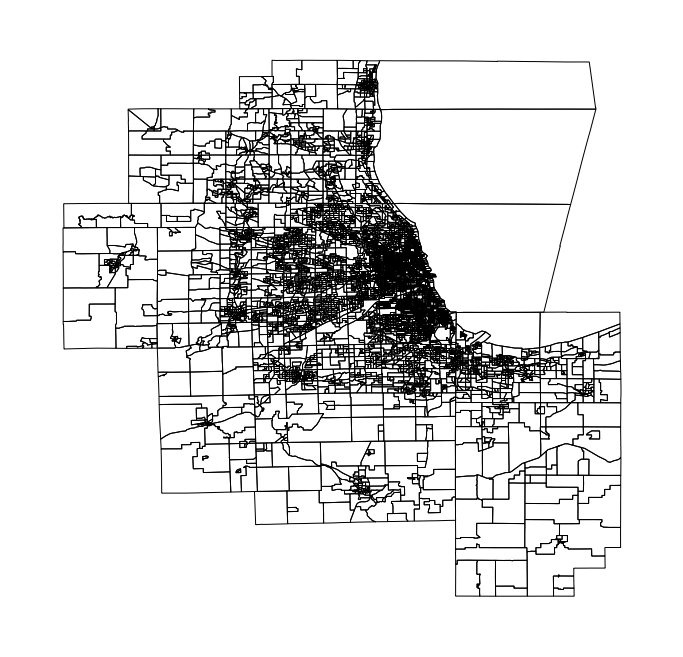

In [66]:
geoplot.polyplot(gdf, figsize=(12, 12))


In [71]:
gdf[gdf['pop_total'].astype(int)==0]

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
20,170313511003,17,031,351100,3,IL,Cook County,H1,0,110757,0,41.8294362,-87.6127729,0.0,0.0,"POLYGON ((-87.61448 41.83112, -87.61448 41.830..."
122,170310608002,17,031,060800,2,IL,Cook County,H1,0,61971,65882,41.953959,-87.6426489,0.0,0.0,"POLYGON ((-87.64526 41.95464, -87.64523 41.954..."
130,170310609002,17,031,060900,2,IL,Cook County,H1,0,255845,404435,41.9495929,-87.6390097,0.0,0.0,"POLYGON ((-87.64503 41.95235, -87.64504 41.952..."
532,170310619024,17,031,061902,4,IL,Cook County,H1,0,22753,0,41.9414461,-87.639295,0.0,0.0,"POLYGON ((-87.63812 41.94055, -87.63815 41.940..."
807,170313817001,17,031,381700,1,IL,Cook County,H1,0,196802,0,41.8055502,-87.6274463,0.0,0.0,"POLYGON ((-87.62892 41.80919, -87.62893 41.808..."
897,171979800001,17,197,980000,1,IL,Will County,H1,0,74160448,58905,41.3668348,-88.0987419,0.0,0.0,"POLYGON ((-88.18658 41.37700, -88.18658 41.375..."
1148,170979900000,17,097,990000,0,IL,Lake County,H1,0,0,2298779970,42.3267427,-87.4318497,0.0,0.0,"POLYGON ((-87.82027 42.30448, -87.82118 42.299..."
1816,170319800001,17,031,980000,1,IL,Cook County,H1,0,19948324,92402,41.9794191,-87.9024376,0.0,0.0,"POLYGON ((-87.92046 42.00563, -87.92044 42.005..."
2201,170438408011,17,043,840801,1,IL,DuPage County,H1,0,1220613,7876,41.957213,-87.9302661,0.0,0.0,"POLYGON ((-87.93679 41.96063, -87.93680 41.958..."
3749,170319900000,17,031,990000,0,IL,Cook County,H1,0,0,1717072181,41.9739391,-87.4002947,0.0,0.0,"POLYGON ((-87.11116 42.14941, -87.12504 42.149..."


In [75]:
# Remove blocks with zero population
gdf = gdf[gdf['pop_total'].astype(int)!=0]
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,170312909001,17,031,290900,1,IL,Cook County,H1,935,164717,0,41.8643125,-87.7275607,0.005676,0.075342,"POLYGON ((-87.73006 41.86610, -87.73006 41.865..."
1,170312909002,17,031,290900,2,IL,Cook County,H1,1129,164694,0,41.8606607,-87.7274518,0.006855,0.082796,"POLYGON ((-87.72995 41.86245, -87.72994 41.862..."
2,170312909003,17,031,290900,3,IL,Cook County,H1,765,247352,0,41.8605723,-87.7335667,0.003093,0.055613,"POLYGON ((-87.72995 41.86245, -87.73019 41.862..."
3,170312909004,17,031,290900,4,IL,Cook County,H1,1075,419733,0,41.8634334,-87.7356877,0.002561,0.050608,"POLYGON ((-87.73993 41.86596, -87.73993 41.865..."
4,170318387002,17,031,838700,2,IL,Cook County,H1,1016,163809,0,41.8607151,-87.7225793,0.006202,0.078755,"POLYGON ((-87.72506 41.86252, -87.72505 41.862..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,550590030023,55,059,003002,3,WI,Kenosha County,H1,1503,12088501,0,42.543044,-88.2248612,0.000124,0.011150,"POLYGON ((-88.25640 42.55260, -88.25639 42.551..."
6670,550590005004,55,059,000500,4,WI,Kenosha County,H1,2013,1483769,0,42.6239621,-87.8412445,0.001357,0.036833,"POLYGON ((-87.84589 42.63182, -87.84574 42.631..."
6671,550590006024,55,059,000602,4,WI,Kenosha County,H1,1636,812865,0,42.6283628,-87.852108,0.002013,0.044862,"POLYGON ((-87.85827 42.63217, -87.85825 42.631..."
6672,550590006015,55,059,000601,5,WI,Kenosha County,H1,480,5405952,0,42.6550745,-87.8851358,0.000089,0.009423,"POLYGON ((-87.89562 42.66896, -87.89561 42.667..."


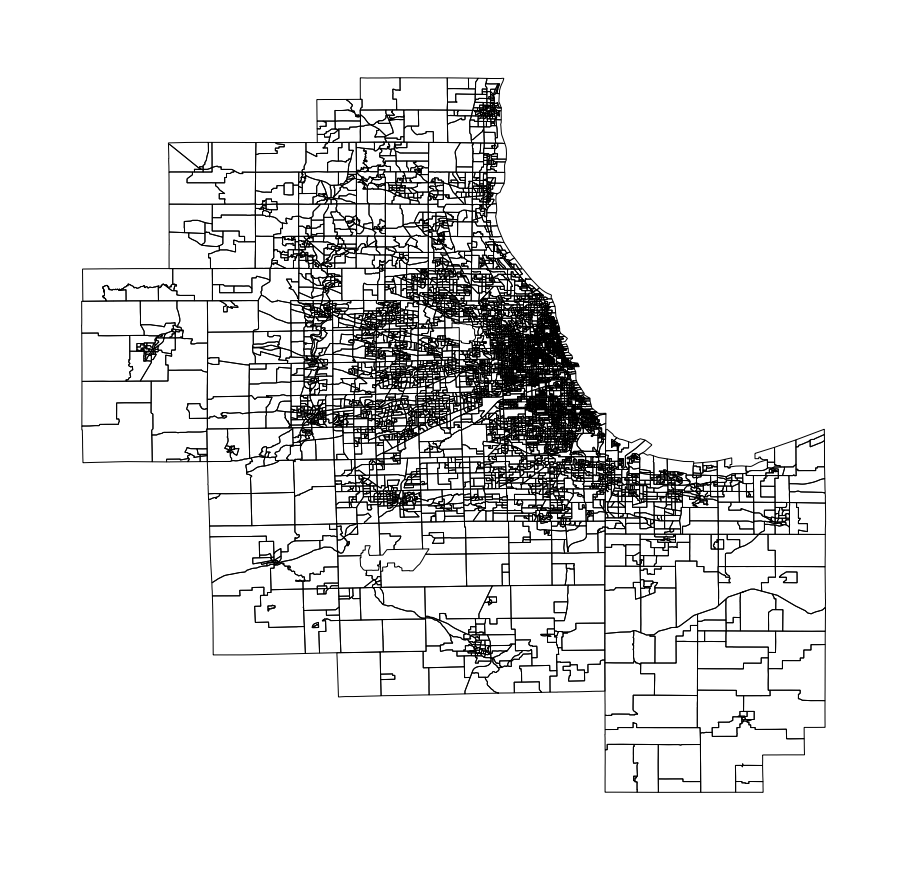

In [76]:
geoplot.polyplot(gdf, figsize=(16,16))

In [50]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1965667,2020-01-01 00:00:00+00:00,170319900000,19,1,1,1,5.263158,5.263158,5.263158,-2.393167,-0.359531,0.064910,1,-25.703107
1965643,2020-01-01 00:00:00+00:00,170311002005,54,18,1,1,33.333333,1.851852,1.851852,0.038678,-1.054165,-0.724282,1,2.367068
1965644,2020-01-01 00:00:00+00:00,170312214003,56,25,2,1,44.642857,3.571429,1.785714,1.018473,-0.704013,-0.739583,1,13.676592
1965645,2020-01-01 00:00:00+00:00,170318241074,123,44,2,1,35.772358,1.626016,0.813008,0.249982,-1.100151,-0.964615,1,4.806092
1965646,2020-01-01 00:00:00+00:00,170318263012,72,25,3,1,34.722222,4.166667,1.388889,0.159004,-0.582806,-0.831387,1,3.755957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,2020-12-31 00:00:00+00:00,170898503022,113,26,10,1,23.008850,8.849558,0.884956,-0.855778,0.370757,-0.947970,12,-7.957416
2353876,2020-12-31 00:00:00+00:00,171978802042,241,86,14,10,35.684647,5.809129,4.149378,0.242383,-0.248356,-0.192759,12,4.718382
2353877,2020-12-31 00:00:00+00:00,171978838081,78,29,2,1,37.179487,2.564103,1.282051,0.371888,-0.909132,-0.856103,12,6.213222
2354426,2020-12-31 00:00:00+00:00,170316120002,29,16,1,1,55.172414,3.448276,3.448276,1.930695,-0.729090,-0.354956,12,24.206149


In [61]:
rolling_mobility = devices_mobility.rolling(10).mean()[9:]
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1965651,2.094187e+11,66.8,24.3,2.5,1.1,32.544542,4.400528,2.555332,-0.029658,-0.535186,-0.561535,1.0,1.578276
1965652,2.094177e+11,76.2,27.1,2.8,1.1,34.584597,4.228194,2.117512,0.147081,-0.570278,-0.662823,1.0,3.618332
1965642,2.104756e+11,82.4,30.1,3.5,1.2,35.389195,4.732664,2.104740,0.216787,-0.467554,-0.665778,1.0,4.422930
1965653,2.104755e+11,82.7,28.8,3.5,1.3,32.958808,4.714504,2.265152,0.006231,-0.471252,-0.628667,1.0,1.992542
1965655,2.104755e+11,79.1,26.9,3.4,1.3,32.255135,4.666845,2.298794,-0.054731,-0.480956,-0.620884,1.0,1.288870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,1.715867e+11,71.4,21.6,5.2,2.3,31.252848,7.233774,3.293599,-0.141563,0.041740,-0.390740,12.0,0.286582
2353876,1.715867e+11,91.6,28.8,6.1,3.2,31.231569,6.532635,3.452126,-0.143407,-0.101031,-0.354065,12.0,0.265304
2353877,1.707115e+11,90.9,30.5,5.6,3.2,33.537753,5.965516,3.462684,0.056388,-0.216512,-0.351623,12.0,2.571488
2354426,1.707121e+11,88.1,30.0,5.5,3.0,35.370784,5.959466,3.281196,0.215192,-0.217744,-0.393609,12.0,4.404518


In [62]:
rolling_mobility['percentage_completely_home_deviation'] = rolling_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1965651,2.094187e+11,66.8,24.3,2.5,1.1,32.544542,4.400528,2.555332,-0.029658,-0.535186,-0.561535,1.0,1.578276
1965652,2.094177e+11,76.2,27.1,2.8,1.1,34.584597,4.228194,2.117512,0.147081,-0.570278,-0.662823,1.0,3.618332
1965642,2.104756e+11,82.4,30.1,3.5,1.2,35.389195,4.732664,2.104740,0.216787,-0.467554,-0.665778,1.0,4.422930
1965653,2.104755e+11,82.7,28.8,3.5,1.3,32.958808,4.714504,2.265152,0.006231,-0.471252,-0.628667,1.0,1.992542
1965655,2.104755e+11,79.1,26.9,3.4,1.3,32.255135,4.666845,2.298794,-0.054731,-0.480956,-0.620884,1.0,1.288870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353875,1.715867e+11,71.4,21.6,5.2,2.3,31.252848,7.233774,3.293599,-0.141563,0.041740,-0.390740,12.0,0.286582
2353876,1.715867e+11,91.6,28.8,6.1,3.2,31.231569,6.532635,3.452126,-0.143407,-0.101031,-0.354065,12.0,0.265304
2353877,1.707115e+11,90.9,30.5,5.6,3.2,33.537753,5.965516,3.462684,0.056388,-0.216512,-0.351623,12.0,2.571488
2354426,1.707121e+11,88.1,30.0,5.5,3.0,35.370784,5.959466,3.281196,0.215192,-0.217744,-0.393609,12.0,4.404518


In [77]:
count = 0
path = Path('drive/MyDrive/big-data-project/sketch/justin/ch-time')

In [94]:
str(days[0]).split(' ')[0]

'2020-01-01'

In [95]:

import matplotlib.pyplot as plt

# Turn interactive plotting off
plt.ioff()

import mapclassify
# For Each day select data, 
for day in tqdm(days):
  # setup new arrays to use
  # print(day)

  row = devices_mobility[devices_mobility['date']==day]
  merged_gdf = gdf.merge(row, how='inner', left_on='cbg', right_on='cbg')

  scheme = mapclassify.Quantiles(devices_mobility['percentage_completely_home_deviation'], k=10)

  fig, ax = plt.subplots(1, 1, figsize=(20,20))

  geoplot.choropleth(merged_gdf, hue=merged_gdf['percentage_completely_home_deviation'], 
                     edgecolor='white', linewidth=0.5,
                     scheme=scheme,
                     ax=ax, 
                     cmap='RdBu',
                     legend=True)
  
  fig.savefig(path/(str(day).split(' ')[0]+'.png'))
  plt.close(fig)



# Loop insert zeros for all empty rows
# merge all cbg with map, 
# create map visualization, 
# save image with frame number